In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Basic Classification

In [4]:
file1 = r'D:\Programing\python_projects\machine_learning_algorithm\data_set\lec1_pay_status.csv'
df = pd.read_csv(file1)
df.head()

,Unnamed: 0,Debt,Income,Status
0,0,1170.93,6552.53,Did Not Pay
1,1,570.94,7247.80,Did Not Pay
2,2,422.67,8074.38,Did Not Pay
3,3,872.42,5776.60,Did Not Pay
4,4,887.56,6297.35,Did Not Pay


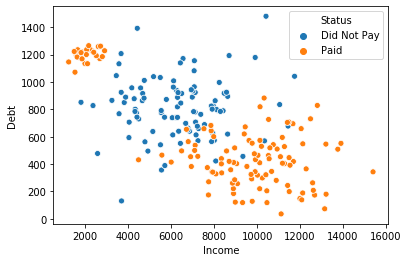

In [5]:
sns.scatterplot(data=df, x='Income', y='Debt', hue='Status')

First we create a model.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=1)

Then we "train" or "fit" it to our data. Here we tell the model that we want it to try to learn to predict "Status" given "Income" and "Debt".

In [7]:
knc.fit(df[['Income', 'Debt']], df['Status'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Now we can have it make predictions. For example, suppose we want to predict a customer with Income = 13000 and Debt = 400.

In [8]:
knc.predict([[13000, 400]])

array(['Paid'], dtype=object)

As you see above, the model predicts that the customer will pay. Similarly, as you can see below, if we pick income = 2000, debt = 400, the prediction is also paid. This corresponds to the top left of the figure.

In [9]:
knc.predict([[2000, 12000]])

array(['Paid'], dtype=object)

We can also generate a picture showing the prediction for each possible point in our space, as shown below. This syntax is fairly advanced, so don't feel too worried! Often when working on machine learning notebooks and especially with visualization, you'll be borrowing bits of code you haven't fully understood.

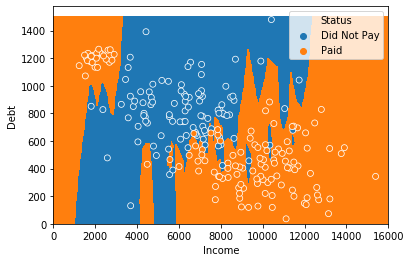

In [10]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])
xx, yy = np.meshgrid(np.linspace(0, 16000, 500), np.linspace(0, 1500, 500))
Z_string = knc.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)

sns.scatterplot(data=df, x='Income', y='Debt', hue='Status')
fig = plt.gcf()
fig.savefig('paid_unpaid_decision_boundaries.png', dpi=300, bbox_inches='tight')

## k Nearest Neighbors

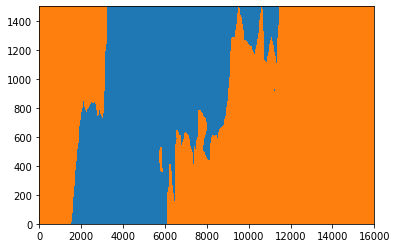

In [11]:
knc3 = KNeighborsClassifier(n_neighbors=3)
knc3.fit(df[['Income', 'Debt']], df['Status'])

xx, yy = np.meshgrid(np.linspace(0, 16000, 500), np.linspace(0, 1500, 500))
Z_string = knc3.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)

fig = plt.gcf()
fig.savefig("3_nearest_paid_unpaid_decision_boundaries.png",
            dpi=300,
            bbox_inches="tight")

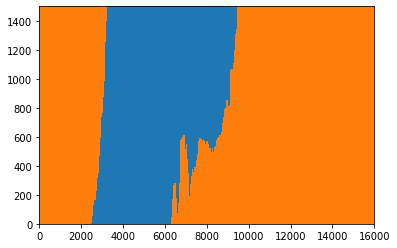

In [12]:
knc10 = KNeighborsClassifier(n_neighbors=10)
knc10.fit(df[['Income', 'Debt']], df['Status'])

xx, yy = np.meshgrid(np.linspace(0, 16000, 500), np.linspace(0, 1500, 500))

Z_string = knc10.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)

fig = plt.gcf()
fig.savefig("10_nearest_paid_unpaid_decision_boundaries.png",
            dpi=300,
            bbox_inches="tight")

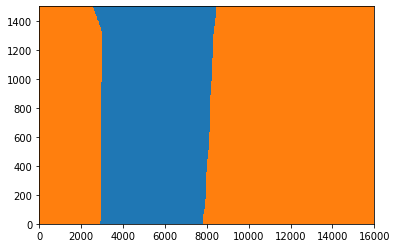

In [13]:
knc50 = KNeighborsClassifier(n_neighbors=50)
knc50.fit(df[['Income', 'Debt']], df['Status'])

xx, yy = np.meshgrid(np.linspace(0, 16000, 500), np.linspace(0, 1500, 500))

Z_string = knc50.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)

fig = plt.gcf()
fig.savefig("50_nearest_paid_unpaid_decision_boundaries.png",
            dpi=300,
            bbox_inches="tight")

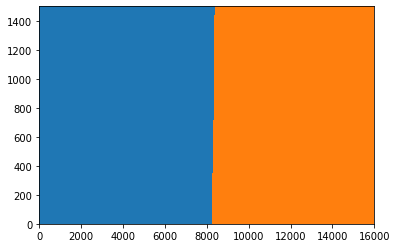

In [14]:
knc192 = KNeighborsClassifier(n_neighbors=192)
knc192.fit(df[['Income', 'Debt']], df['Status'])

xx, yy = np.meshgrid(np.linspace(0, 16000, 500), np.linspace(0, 1500, 500))

Z_string = knc192.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)

fig = plt.gcf()
fig.savefig("192_nearest_paid_unpaid_decision_boundaries.png",
            dpi=300,
            bbox_inches="tight")

## Nearest Neighbors for Regression

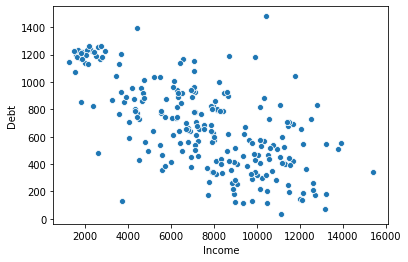

In [15]:
sns.scatterplot(data=df, x='Income', y='Debt')
fig = plt.gcf()
fig.savefig('debt_vs_income.png', dpi=300, bbox_inches='tight')

In [16]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=1)
knr.fit(df[['Income']], df['Debt'])
knr.predict([[15800]])

array([343.56])

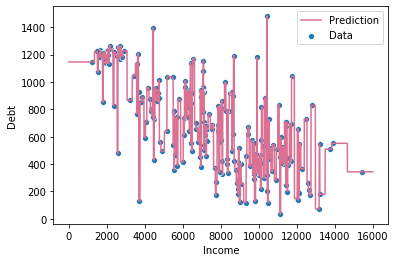

In [17]:
income_values = np.linspace(0, 16000, 2000)
sns.scatterplot(data=df, x='Income', y='Debt')
sns.lineplot(income_values,
             knr.predict(income_values.reshape(-1, 1)),
             color='palevioletred')
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig('debt_vs_income_prediction_k1.png', dpi=300, bbox_iches='tight')

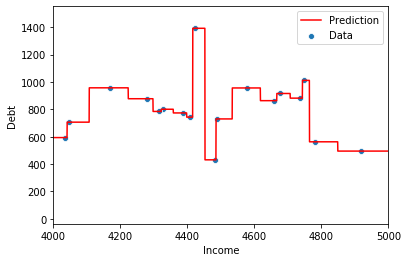

In [18]:
income_values = np.linspace(4000, 5000, 2000)
sns.scatterplot(data=df, x='Income', y='Debt')
sns.lineplot(income_values,
             knr.predict(income_values.reshape(-1, 1)),
             color='red')
plt.gca().set_xlim(4000, 5000)
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig('debt_vs_income_prediction_k1_zoomin.png',
            dpi=300,
            bbox_inches='tight')

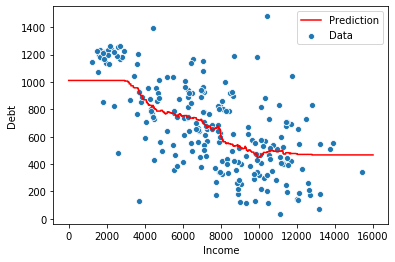

In [19]:
knr50 = KNeighborsRegressor(n_neighbors=50)
knr50.fit(df[['Income']], df['Debt'])

income_values = np.linspace(0, 16000, 2000)
sns.scatterplot(data=df, x='Income', y='Debt')
sns.lineplot(income_values,
             knr50.predict(income_values.reshape(-1, 1)),
             color='red')
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig('debt_vs_income_prediction_k50.png', dpi=300, bbox_inches='tight')

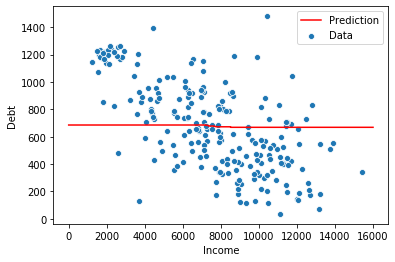

In [20]:
knr220 = KNeighborsRegressor(n_neighbors=220)
knr220.fit(df[['Income']], df['Debt'])

income_values = np.linspace(0, 16000, 2000)
sns.scatterplot(data=df, x='Income', y='Debt')
sns.lineplot(income_values,
             knr220.predict(income_values.reshape(-1, 1)),
             color='red')
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig('debt_vs_income_prediction_k220.png', dpi=300, bbox_inches='tight')

## Clustering

In [21]:
file2 = r'D:\Programing\python_projects\machine_learning_algorithm\data_set\clustering_example.csv'
df = pd.read_csv(file2)
df

,Unnamed: 0,x,y
0,0,1.874703,0.034280
1,1,1.697667,-0.259321
2,2,0.848976,-0.407407
3,3,1.016452,0.153139
4,4,-0.916757,0.383583
...,...,...,...
595,595,4.695472,0.445572
596,596,4.321248,-0.979774
597,597,3.229026,-0.743452
598,598,3.418579,-0.873572


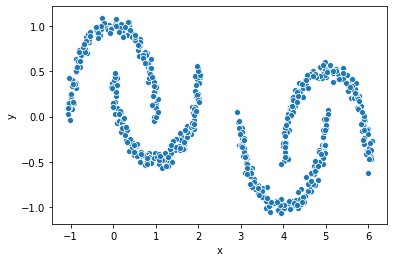

In [22]:
sns.scatterplot(data=df, x='x', y='y')

In [29]:
from sklearn.cluster import AgglomerativeClustering
ac15 = AgglomerativeClustering(n_clusters=None, distance_threshold=15)
labels = ac15.fit_predict(df[['x', 'y']])

In [30]:
df['cluster'] = labels

In [31]:
df

,Unnamed: 0,x,y,cluster
0,0,1.874703,0.034280,0
1,1,1.697667,-0.259321,0
2,2,0.848976,-0.407407,0
3,3,1.016452,0.153139,0
4,4,-0.916757,0.383583,3
...,...,...,...,...
595,595,4.695472,0.445572,1
596,596,4.321248,-0.979774,2
597,597,3.229026,-0.743452,2
598,598,3.418579,-0.873572,2


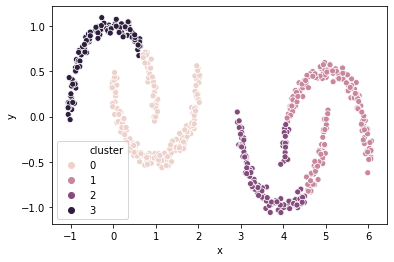

In [32]:
sns.scatterplot(data=df, x='x', y='y', hue='cluster')
fig = plt.gcf()
fig.savefig('four_moons_clustered.png', dpi=300, bbox_inches='tight')

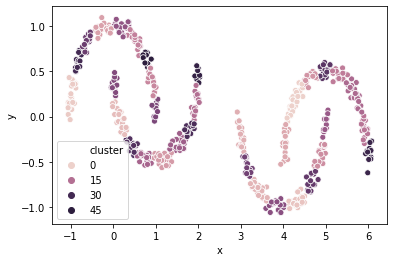

In [34]:
ac = AgglomerativeClustering(n_clusters=None, distance_threshold=1)
labels = ac.fit_predict(df[['x', 'y']])

df['cluster'] = labels
sns.scatterplot(data=df, x='x', y='y', hue='cluster')
fig = plt.gcf()
fig.savefig('four_moons_clustered_higher_threshold.png',
            dpi=300,
            bbox_inches='tight')

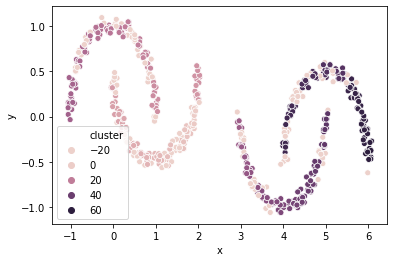

In [35]:
from sklearn.cluster import OPTICS
op = OPTICS()
labels = op.fit_predict(df[['x', 'y']])

df['cluster'] = labels
sns.scatterplot(data=df, x='x', y='y', hue='cluster')

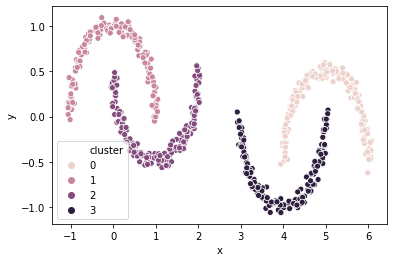

In [36]:
ac4 = AgglomerativeClustering(n_clusters=4, linkage='single')
labels = ac4.fit_predict(df[['x', 'y']])

df['cluster'] = labels
sns.scatterplot(data=df, x='x', y='y', hue='cluster')